In [ ]:
#Present your choice of project. 
#Don't just give an ML task, present a specific research question around that task 
#and a biological research question that can be addressed by this. 

In [1]:
!pip install imbalanced-learn

In [36]:
import pandas as pd
import numpy as np

In [37]:
# First Dataset
df1 = pd.read_csv("prediction_file_crc.csv")

# Handle "nan" strings
df1.replace('nan', np.nan, inplace=True)

# Check for missing values and display counts
missing_values_df1 = df1.isna().sum()
print(f"Missing Values in First Dataset:\n{missing_values_df1}\n")

# Remove rows with missing values
df1_cleaned = df1.dropna()
df1_cleaned.dtypes
# Display cleaned DataFrame
print("Cleaned First Dataset:")
#df1_cleaned.head()

# Remove rows where MSI status is 'Indeterminate'
msi_status_column = 'msi_status'
df1_filtered = df1_cleaned[df1_cleaned[msi_status_column] != 'Indeterminate']

# Display the filtered DataFrame
print("Filtered First Dataset:")
df1_filtered


Missing Values in First Dataset:
Unnamed: 0                  0
TBL                         0
msi_status                 25
fraction_genome_altered     0
aneuploidy_score            0
TMB                         0
TP53                        0
KRAS                        0
BRAF                        0
APC                         0
TTN                         0
dtype: int64

Cleaned First Dataset:
Filtered First Dataset:


,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,TTN
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,WT
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,WT
3,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,SNV
4,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,WT
5,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,SNV,SNV
...,...,...,...,...,...,...,...,...,...,...,...
457,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,SNV
458,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,WT
459,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,WT
460,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,WT


In [38]:
#Second dataset 
df2=pd.read_csv("tcga_rna_count_data_crc.csv")
expression_columns = df2.columns[1:]

# Replace 'nan' strings with actual NaN values
df2.replace('nan', np.nan, inplace=True)

# Replace 0s with NaN in gene expression columns
df2[expression_columns] = df2[expression_columns].replace(0, np.nan)

# Drop rows where any gene expression is NaN
df2_filtered = df2.dropna(subset=expression_columns, how='any')

# Reset the index
df2_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print("Filtered Second Dataset:")
df2_filtered

Filtered Second Dataset:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,PIP5KL1,4.0,39.0,2.0,24.0,12.0,13.0,14.0,4.0,8.0,...,8.0,11.0,7.0,4.0,6.0,12.0,3.0,3.0,249.0,10.0
13085,P2RX5-TAX1BP3,18.0,71.0,13.0,30.0,13.0,21.0,26.0,22.0,18.0,...,28.0,22.0,22.0,12.0,9.0,20.0,25.0,21.0,37.0,15.0
13086,RPS15AP19,8.0,8.0,69.0,8.0,7.0,5.0,13.0,15.0,12.0,...,21.0,11.0,7.0,17.0,43.0,9.0,33.0,20.0,17.0,40.0
13087,LINC00539,19.0,59.0,20.0,17.0,15.0,30.0,30.0,10.0,24.0,...,13.0,63.0,12.0,4.0,19.0,20.0,21.0,8.0,15.0,3.0


In [39]:
# Calculate CPM
numeric_columns = df2_filtered.columns[1:]
cpm_df = (df2_filtered[numeric_columns] / df2_filtered[numeric_columns].sum(axis=0)) * 1e6
cutoff = 1

# Filter rows where every value is above the cutoff
filtered_cpm_df = cpm_df[cpm_df.apply(lambda row: (row > cutoff).all(), axis=1)]
filtered_cpm_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print("Filtered CPM DataFrame:")
filtered_cpm_df

Filtered CPM DataFrame:


,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,TCGA-AA-3495-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,7509.415217,9010.258689,17971.800947,6545.989673,10568.910547,13748.839360,4950.265220,11153.014739,34704.838635,11552.271047,...,22531.193842,10246.997803,19345.663821,11003.181699,18299.370885,4665.227213,8168.990234,13839.606136,3891.875980,5673.388454
1,4631.990881,9406.632015,11332.842652,1771.327483,7003.184928,14747.245604,6406.946017,18096.742162,17130.061616,13892.258655,...,11737.361869,7188.380993,15019.017702,9684.073988,15883.858767,5222.847962,7454.426157,9825.335192,3874.333519,5350.195467
2,5718.679709,7784.415660,11199.405749,5100.984505,6738.427258,13871.572508,4586.630847,13359.682638,14941.684612,11929.958833,...,16028.988996,4056.608520,12652.841683,8452.830817,9506.817740,4904.395294,5046.321792,7907.168989,2165.871937,4681.244747
3,5734.321059,3839.820719,9907.983689,5680.665620,9091.347120,16473.587266,4114.931885,9089.257680,9882.702480,8383.978455,...,15289.955419,4839.894619,7245.845991,4361.488619,11967.670007,5134.343789,6112.217111,8076.423678,1881.874828,6477.962704
4,3040.184675,4667.173425,5709.240631,6071.214936,5261.030555,5137.710913,9729.429771,6266.562575,5351.487584,5075.854260,...,6163.124883,4979.669142,8145.280697,9762.878565,4374.235550,7182.464507,5819.784691,8475.197374,4875.332091,7086.975816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,4.700372,5.019329,3.983191,2.115874,4.168099,2.649657,4.401426,3.204279,3.240574,4.438229,...,3.145022,4.761372,3.137877,1.766408,2.129100,4.638786,4.966806,4.904768,5.329093,3.525742
9425,4.009922,5.975391,3.063993,5.255557,3.056606,4.527569,2.526036,3.460621,5.627344,2.849233,...,4.868960,9.522745,1.785344,2.165274,5.855024,4.097594,4.966806,4.221316,4.665548,3.666771
9426,3.266360,3.551090,4.340657,3.867726,4.334823,2.289510,3.980420,3.057798,2.755458,2.794440,...,2.492721,4.438567,3.624789,4.216586,3.725925,3.691701,3.654820,3.899692,4.603341,5.453147
9427,9.214854,3.073058,3.319326,5.278308,2.667584,3.730100,3.272365,4.595852,3.551048,4.931365,...,4.519513,5.447333,2.921472,3.703758,4.306588,4.561473,5.060519,3.578068,3.151837,3.384712


In [40]:
# Get the indices of filtered rows
filtered_indices = filtered_cpm_df.index

# Use the indices to select corresponding rows from the original DataFrame
filtered_original_values_with_gene = df2_filtered.iloc[filtered_indices]

# Print the resulting DataFrame
print("Filtered Original Values DataFrame with Gene Column:")
filtered_original_values_with_gene


Filtered Original Values DataFrame with Gene Column:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,RWDD2B,576.0,1073.0,286.0,801.0,327.0,788.0,760.0,934.0,724.0,...,357.0,187.0,204.0,214.0,321.0,767.0,339.0,349.0,860.0,338.0
9425,TTC5,508.0,987.0,311.0,739.0,308.0,276.0,690.0,502.0,556.0,...,243.0,973.0,243.0,217.0,308.0,1082.0,392.0,445.0,1085.0,374.0
9426,PDLIM2,265.0,436.0,419.0,478.0,290.0,456.0,777.0,402.0,479.0,...,476.0,325.0,431.0,256.0,225.0,599.0,428.0,525.0,695.0,808.0
9427,BLM,633.0,1123.0,383.0,899.0,186.0,518.0,1236.0,442.0,283.0,...,705.0,601.0,332.0,302.0,306.0,673.0,353.0,287.0,1105.0,306.0


In [41]:
# Transpose the second dataframe
df2_transposed = filtered_original_values_with_gene.T
df2_transposed
# Reset the index and use the first row as column names
df2_transposed.reset_index(inplace=True)
df2_transposed.columns = df2_transposed.iloc[0]

# Drop the first row (it's now redundant)
df2_transposed = df2_transposed.iloc[1:]

# Merge the two dataframes based on index with specified suffixes
merged_df = df1_filtered.merge(df2_transposed, left_on='Unnamed: 0', right_on='Unnamed: 0', suffixes=('', '_df2'))

# Reset the index of the merged dataframe
merged_df.reset_index(drop=True, inplace=True)
merged_df
merged_df.to_csv(path_or_buf="merged.csv")

<Axes: xlabel='msi_status'>

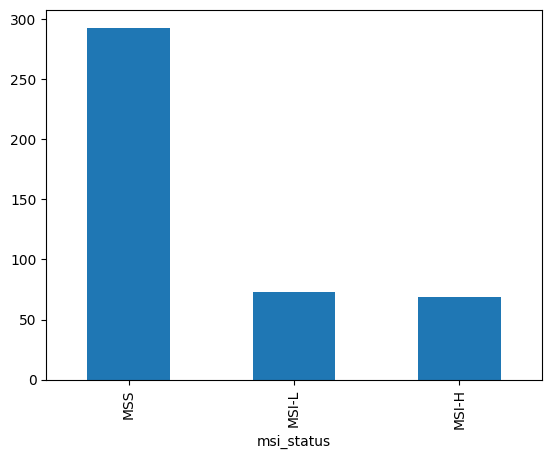

In [42]:
merged_df['msi_status'].value_counts().plot(kind = 'bar')

In [43]:
#oversampling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['msi_status_encoded'] = label_encoder.fit_transform(merged_df['msi_status'])
y = merged_df['msi_status_encoded']
X = merged_df.drop(['Unnamed: 0', 'msi_status', 'msi_status_encoded'], axis=1)
X = X.select_dtypes(include=[np.number])
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)  
X_resampled, y_resampled = smote.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[56  0  0]
 [ 0 53 11]
 [ 3 17 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       0.76      0.83      0.79        64
           2       0.77      0.64      0.70        56

    accuracy                           0.82       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.82      0.82      0.82       176

